In [2]:
import re
import time
import requests
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup
from fuzzymatcher import link_table, fuzzy_left_join

In [24]:

import fresh_data.get_datasets
import importlib
importlib.reload(fresh_data.get_datasets)
from fresh_data.get_datasets import *

In [25]:

open_secrets = load_open_secrets_data("open_secrets")

In [21]:
open_secrets.head()

,Total Spent,year_range,Cash on Hand,Total Raised,representative,state_name,district_code
0,5580964,1999-2000,74748,3816891,Richard A. Gephardt,Missouri,03
1,4650104,1999-2000,1728,4660714,Adam Schiff,California,27
2,3575020,1999-2000,158590,3477160,Bob Barr,Georgia,07
3,3086708,1999-2000,230140,2755056,E. Clay Shaw Jr.,Florida,22
4,2904763,1999-2000,113883,2905544,Anne M. Northup,Kentucky,03


In [22]:
open_secrets.year_range.unique()

array(['1999-2000', '2001-2002', '2003-2004', '2005-2006', '2007-2008',
       '2009-2010', '2011-2012', '2013-2014', '2015-2016', '2017-2018',
       '2019-2020'], dtype=object)

In [27]:
state_district_mask = (open_secrets["state_name"] == "NewYork") & (open_secrets["district_code"] == "12")
open_secrets[state_district_mask]

,Total Spent,year_range,Cash on Hand,Total Raised,representative,state_name,district_code
329,392579,1999-2000,208732,474066,Nydia M. Velazquez,NewYork,12
754,551994,2003-2004,240961,709017,Nydia M. Velazquez,NewYork,12
1164,698615,2005-2006,309102,766762,Nydia M. Velazquez,NewYork,12
2098,690875,2009-2010,826841,838912,Nydia M. Velazquez,NewYork,12
2720,1457836,2013-2014,476951,1410064,Carolyn B. Maloney,NewYork,12
3103,1708670,2015-2016,457518,1689237,Carolyn B Maloney,NewYork,12
3527,2404709,2017-2018,107909,2055099,Carolyn B Maloney,NewYork,12
3955,3059202,2019-2020,116416,3067173,Carolyn B Maloney,NewYork,12


<AxesSubplot:xlabel='year_range'>

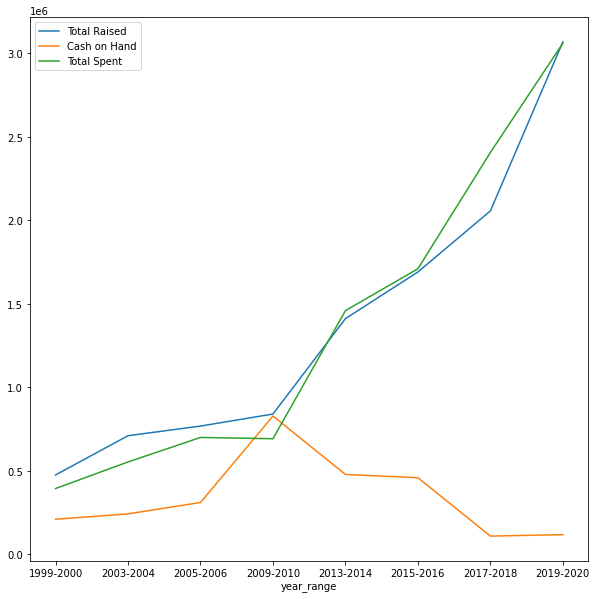

In [32]:
open_secrets[state_district_mask].plot(x="year_range", y=["Total Raised", "Cash on Hand", "Total Spent"], figsize=(10,10))